# Understanding Bias and Variance

#### Python Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from mlxtend.evaluate import bias_variance_decomp

In [2]:
%matplotlib inline
plt.style.use('seaborn')
np.random.seed(101)

#### Create the data points for plotting

In [3]:
x = np.linspace(1, 9, 500)

In [4]:
fx = 1 + 1 / np.power(1.5, (x-5))

In [5]:
hx = 1 + np.power(1.5, (x-5))

#### Plot the Bias-Variance trade-off graph

**Thanks** to `https://graphsketch.com` for allowing me to figure the right equations for `fx` and `hx`

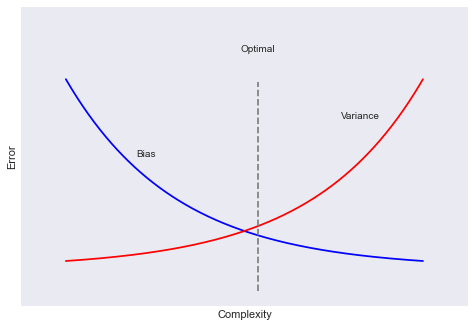

In [6]:
plt.plot(x, fx, color='blue')
plt.annotate('Bias', (2.8, 4), xytext=(2.8, 4), ha='center')
plt.plot(x, hx, color='red')
plt.annotate('Variance', (7.6, 5), xytext=(7.6, 5), ha='center')
plt.axvline(x=5.3, ymin=0.05, ymax=0.75, linestyle='--', color='grey')
plt.annotate('Optimal', (5.3, 6.8), xytext=(5.3, 6.8), ha='center')
plt.xlim(xmin=0, xmax=10)
plt.xticks([])
plt.ylim(ymin=0, ymax=8)
plt.yticks([])
plt.xlabel('Complexity')
plt.ylabel('Error')
plt.show()

#### Load the Age vs BP data set

**Thanks** to `https://people.sc.fsu.edu/~jburkardt/datasets/regression/regression.html` for this data set

In [7]:
age_bp = pd.read_csv('./data/age_bp.txt')
age_bp.head()

,age,bp
0,39,144
1,47,220
2,45,138
3,47,145
4,65,162


#### Create the train (75%) and test (25%) data sets

In [8]:
X_train, X_test, y_train, y_test = train_test_split(age_bp[['age']], age_bp['bp'], test_size=0.25, random_state=101)

#### Train the Linear Regression model

In [9]:
lr_model = LinearRegression(fit_intercept=True)
lr_model.fit(X_train, y_train)

LinearRegression()

#### Predict using the test data set

In [10]:
y_predict1 = lr_model.predict(X_test)

#### Plot the training data with its predicted values along with the line of best fit

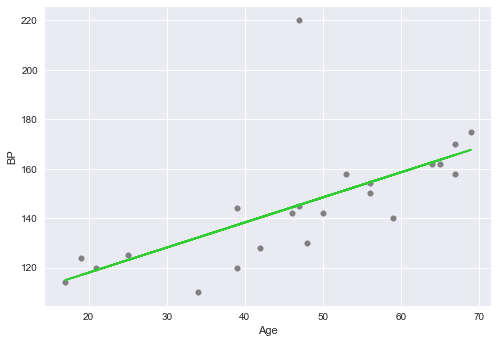

In [11]:
plt.scatter(X_train, y_train, s=32, color='gray')
plt.plot(X_train['age'], lr_model.predict(X_train), color='limegreen')
plt.xlabel('Age')
plt.ylabel('BP')
plt.show()

#### Plot both the training (grey) and test (red) data with its predicted values along with the line of best fit

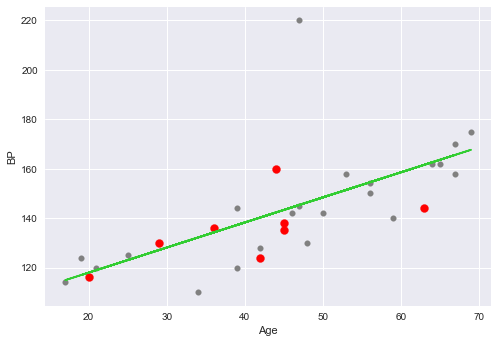

In [12]:
plt.scatter(X_train, y_train, s=32, color='gray')
plt.scatter(X_test, y_test, s=64, color='red')
plt.plot(X_train['age'], lr_model.predict(X_train), color='limegreen')
plt.xlabel('Age')
plt.ylabel('BP')
plt.show()

#### Display the R-Squared value

In [13]:
r2_score(y_test, y_predict1)

0.18258592891453995

#### Display the Bias and Variance values

In [14]:
lr_mse, lr_bias, lr_var = bias_variance_decomp(lr_model, X_train.values, y_train.values, X_test.values, y_test.values, loss='mse', random_seed=101)
lr_bias, lr_var

(123.58281263681596, 19.48775448552398)

#### Create a polynomial transformer

In [15]:
transformer = PolynomialFeatures(degree=8, include_bias=True)

#### Transform the training set to include higher degree features

In [16]:
X_p_train = transformer.fit_transform(X_train)

#### Train the Polynomial Regression model

In [17]:
poly_model = LinearRegression()
poly_model.fit(X_p_train, y_train)

LinearRegression()

#### Predict using the test data set

In [18]:
X_p_test = transformer.fit_transform(X_test)
y_predict2 = poly_model.predict(X_p_test)

#### Display the R-Squared value

In [19]:
r2_score(y_test, y_predict2)

-0.3149631846096608

#### Display the Bias and Variance values

In [20]:
poly_mse, poly_bias, poly_var = bias_variance_decomp(poly_model, X_p_train, y_train.values, X_p_test, y_test.values, loss='mse', random_seed=101)
poly_bias, poly_var

(230.09815849827226, 1148.2936650522113)

#### Plot the training data with its predicted values along with the polynomial line of best fit

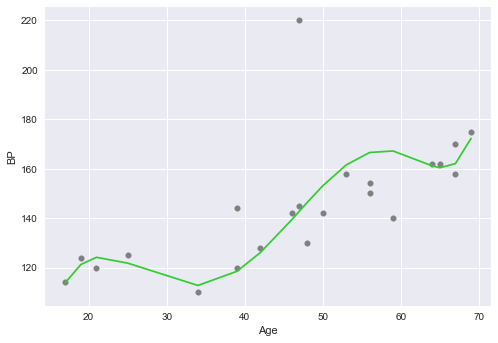

In [21]:
plt.scatter(X_train, y_train, s=32, color='gray')
sorted_Xy = sorted(zip(X_train.age, poly_model.predict(X_p_train)))
X_s, y_s = zip(*sorted_Xy)
plt.plot(X_s, y_s, color='limegreen')
plt.xlabel('Age')
plt.ylabel('BP')
plt.show()

#### Plot both the training (grey) and test (red) data with its predicted values along with the polynomial line of best fit

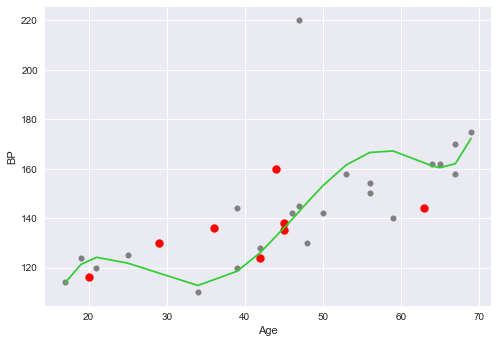

In [22]:
plt.scatter(X_train, y_train, s=32, color='gray')
plt.scatter(X_test, y_test, s=64, color='red')
sorted_Xy = sorted(zip(X_train.age, poly_model.predict(X_p_train)))
X_s, y_s = zip(*sorted_Xy)
plt.plot(X_s, y_s, color='limegreen')
plt.xlabel('Age')
plt.ylabel('BP')
plt.show()